In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [ ]:
# Assuming the Resources folder is in the current directory
file_path = Path("lending_data.csv")

# Read the CSV file into a Pandas DataFrame
lending_df = pd.read_csv(file_path)

# Review the DataFrame
lending_df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [ ]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv(
    Path("Resources/lending_data.csv")
)

# Review the DataFrame
lending_df.tail()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


In [ ]:
# Separate the data into labels and features
y = lending_df['loan_status']
X = lending_df.drop(columns='loan_status')

# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.drop(columns=['loan_status'])

In [ ]:
# Review the y variable Series
# Preview the features data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [ ]:
# Review the X variable DataFrame
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [ ]:
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [ ]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [ ]:
# Review the X variable DataFrame
# Preview the features data
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                    stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression


# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

# Fit the model using training data
classifier

LogisticRegression(max_iter=200, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the model using training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).tail(10)

,Prediction,Actual
76038,1,1
19119,0,0
45193,0,0
25211,0,0
61697,0,0
38069,0,0
36892,0,0
5035,0,0
40821,0,0
35030,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[18675,    84],
       [   46,   579]], dtype=int64)

In [ ]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.93      0.90       625

    accuracy                           0.99     19384
   macro avg       0.94      0.96      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Create a RandomForestClassifier Model with the Original Data - this is for comparison purposes

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [ ]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
# Fit the model and use .ravel()on the "y_train" data.
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18691,93
Actual 1,70,530


Accuracy Score : 0.9915910028889806
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18784
           1       0.85      0.88      0.87       600

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384



In [ ]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.29703998492312944, 'interest_rate'),
 (0.186273936116309, 'borrower_income'),
 (0.17038411491427138, 'debt_to_income'),
 (0.16924829066855973, 'total_debt'),
 (0.11646576782842037, 'loan_size'),
 (0.06046908207975322, 'num_of_accounts'),
 (0.00011882346955686954, 'derogatory_marks')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

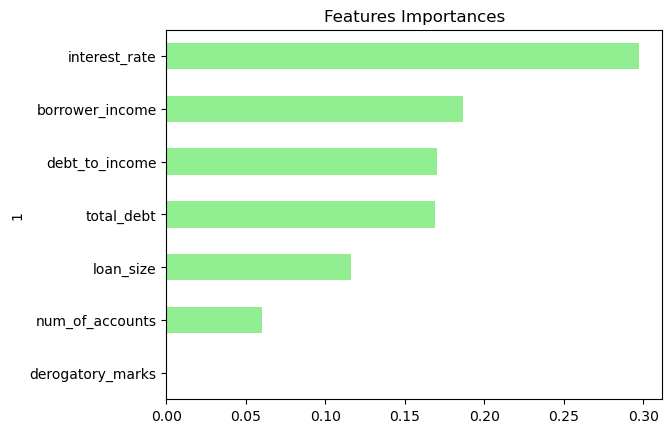

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

---

In [ ]:
Module 20 Report Template
Overview of the Analysis
In this section, describe the analysis you completed for the machine learning models used in this Challenge. This might include:

Explain the purpose of the analysis.
Explain what financial information the data was on, and what you needed to predict.
Provide basic information about the variables you were trying to predict (e.g., value_counts).
Describe the stages of the machine learning process you went through as part of this analysis.
Briefly touch on any methods you used (e.g., LogisticRegression, or any other algorithms).
Results
Using bulleted lists, describe the accuracy scores and the precision and recall scores of all machine learning models.

Machine Learning Model 1:
Description of Model 1 Accuracy, Precision, and Recall scores.
Summary
Summarize the results of the machine learning models, and include a recommendation on the model to use, if any. For example:

Which one seems to perform best? How do you know it performs best?
Does performance depend on the problem we are trying to solve? (For example, is it more important to predict the 1's, or predict the 0's? )
If you do not recommend any of the models, please justify your reasoning.